<center>
<h1>[Python で 超実習ディープラーニング](https://www.seminar-info.jp/entry/seminars/view/1/4174)</h1>
<h3><strong>実践！ 強化学習・画像認識・自然言語処理・ロボティクス</strong></h3>
</center>

<center>
![](https://www.seminar-info.jp/entry/img/logo_ov.jpg)
</center>

<div align='right'>
<a href='mailto:asakawa@ieee.org'>Shin Aasakawa</a>, all rights reserved.<br>
Date: 15/Mar/2019<br>
 MIT license
</div>

---
# kmnist によるPCA

[Original](https://github.com/alrojo/tensorflow-tutorial/tree/master/lab1_FFN)

---

kminst で少し遊んでみます。あらかじめ下記の `kmnist` データが用意できているものとします

| File            | Examples | Download (MNIST format)    | Download (NumPy format)      |
|-----------------|--------------------|----------------------------|------------------------------|
| Training images | 60,000             | [train-images-idx3-ubyte.gz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz) (18MB) | [kmnist-train-imgs.npz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz) (18MB)   |
| Training labels | 60,000             | [train-labels-idx1-ubyte.gz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz) (30KB) | [kmnist-train-labels.npz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz) (30KB)  |
| Testing images  | 10,000             | [t10k-images-idx3-ubyte.gz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz) (3MB) | [kmnist-test-imgs.npz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz) (3MB)   |
| Testing labels  | 10,000             | [t10k-labels-idx1-ubyte.gz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz) (5KB)  | [kmnist-test-labels.npz](http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz) (5KB) |


In [0]:
# データの入手が未だの場合は以下の行頭の # を削除して本セルを実行してください
#!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz
#!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz 
#!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz
#!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz

In [0]:
# データが存在するかどうかの確認
!ls kmnist*.npz

kmnist-test-imgs.npz	kmnist-train-imgs.npz
kmnist-test-labels.npz	kmnist-train-labels.npz


In [0]:
# いくつか必要となるライブラリを輸入 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2)

In [0]:
# データの読み込み
X_test = np.load('kmnist-test-imgs.npz')['arr_0']
y_test = np.load('kmnist-test-labels.npz')['arr_0']
X_train= np.load('kmnist-train-imgs.npz')['arr_0']
y_train= np.load('kmnist-train-labels.npz')['arr_0']

X = X_train.reshape(-1,28*28)
labels = pd.DataFrame(y_train, columns=['label'])

# PCA 主成分分析の実施
principalComponents = pca.fit_transform(X)
pcaDF = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])
kmnistDF = pd.concat([pcaDF, labels], axis=1)

In [0]:
# データが多いと見辛いので最後の 1 万データだけを使ってみます
kmnistDF = kmnistDF.tail(10000)

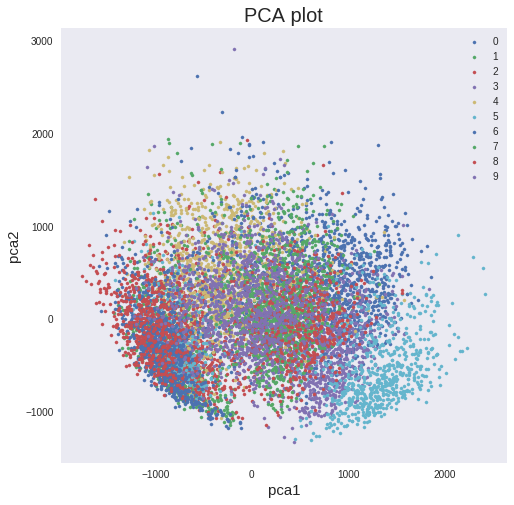

In [0]:
#[Original](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('PCA plot', fontsize = 20)
for target in range(10):
    kept_indices = kmnistDF['label'] == target
    ax.scatter(kmnistDF.loc[kept_indices, 'pca1'], kmnistDF.loc[kept_indices, 'pca2'], 
               s = 10)
ax.legend(range(10))
ax.grid()

# t-SNE による可視化

---

## References

For further details, "How to Use t-SNE Effectively"
https://distill.pub/2016/misread-tsne/ provides a good discussion of the
effects of various parameters, as well as interactive plots to explore
those effects.


1. van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9:2579-2605, 2008. 
1. van der Maaten, L.J.P. t-Distributed Stochastic Neighbor Embedding <https://lvdmaaten.github.io/tsne/>
1. L.J.P. van der Maaten. Accelerating t-SNE using Tree-Based Algorithms. Journal of Machine Learning Research 15(Oct):3221-3245, 2014. <https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf>


In [0]:
from sklearn.manifold import TSNE

In [0]:
size = 1000 # 時間の省略のため 1000 データだけ使います

In [0]:
X = X_train[:size].reshape(-1,28*28)
print(X.shape)

(1000, 784)


In [0]:
tsned_X = TSNE(n_components=2, random_state=0).fit_transform(X)

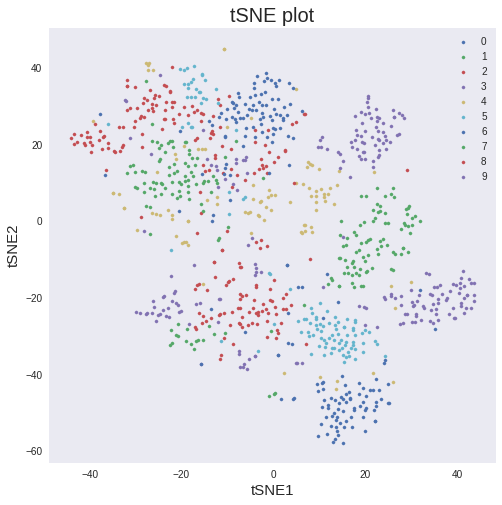

In [0]:
#fig = plt.figure(figsize = (10,8))
#ax = fig.add_subplot(1,1,1) 
#plt.scatter(tsned_X[:, 0], tsned_X[:, 1], c=y_train[:1000])
#plt.colorbar()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE1', fontsize = 15)
ax.set_ylabel('tSNE2', fontsize = 15)
ax.set_title('tSNE plot', fontsize = 20)
for target in range(10):
    kept_indices = y_train[:size] == target
    ax.scatter(tsned_X[kept_indices, 0], tsned_X[kept_indices, 1],
               s = 10)
ax.legend(range(10))
ax.grid()

In [0]:
# もう一度データを読み込みます
X_train= np.load('kmnist-train-imgs.npz')['arr_0'].reshape(-1,28*28).astype('int32')
y_train= np.load('kmnist-train-labels.npz')['arr_0'].astype('int32')
X_test = np.load('kmnist-test-imgs.npz')['arr_0'].reshape(-1,28*28).astype('int32')
y_test = np.load('kmnist-test-labels.npz')['arr_0'].astype('int32')

---

## データの正規化

平均 0 分散 1 にすることを **標準化** といいます

データ処理では前処理にいくつか手法があります。

- 標準化
- 正規化
- 白色化

などなど。用語に混乱が見られる場合もあります。すべてのデータを 0 から 1 までにすることであったり，平均 0分散 1 にすることであったり，無相関化すること

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 訓練データを標準化します
scaler.fit(X_train.reshape(-1,28*28))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 上で正規化した情報を使ってデータを変換します
transformed_X_train = scaler.transform(X_train.reshape(-1,28*28))
transformed_X_test = scaler.transform(X_test.reshape(-1,28*28))

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.9)  # 主成分分析のインスタンスを宣言します。90% までの説明率で計算してみましょう

In [0]:
pca.fit(transformed_X_train)  # 主成分分析を実施します

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
lower_dimensional_data = pca.fit_transform(transformed_X_train) # 実施した主成分分析で次元縮約を確かめます

In [0]:
pca.n_components_  # 実行すると 90 % までに要した次元数が表示されます

175

In [0]:
approximation = pca.inverse_transform(lower_dimensional_data)  # 90% まででどのくらいデータを表現できているかを確認します

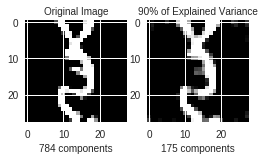

In [0]:
# 直下行の n の値を変えることで別のデータを見ることができます
n = 3
fontsize_ = 10

plt.figure(figsize=(4,2));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(transformed_X_train[n].reshape(28,28) * 255,
              cmap=plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize=fontsize_)
plt.title('Original Image', fontsize=fontsize_);

# 175 percent principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(28, 28) * 255,
              cmap=plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('175 components', fontsize=fontsize_)
plt.title('90% of Explained Variance', fontsize=fontsize_);

In [0]:
# 784次元すべてを使ってみます
pca = PCA()

In [0]:
pca.fit(X_train.reshape(-1,28*28))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.n_components_  # 次元数が表示されます

784

In [0]:
# 分散の総和を計算してみましょう
tot = sum(pca.explained_variance_)
tot

5555628.634218837

In [0]:
transformed_X_train = pca.transform(X_train.reshape(-1,28*28)) # データを主成分次元上に射影します
transformed_X_test = pca.transform(X_test.reshape(-1,28*28))

In [0]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5]) # 最大固有値から上位 5 つを表示します

[10.869167707277336, 5.363875488368757, 4.091240160279048, 3.7853260807001528, 3.188977630472911]


In [0]:
cum_var_exp = np.cumsum(var_exp) # 累積分散を求めます

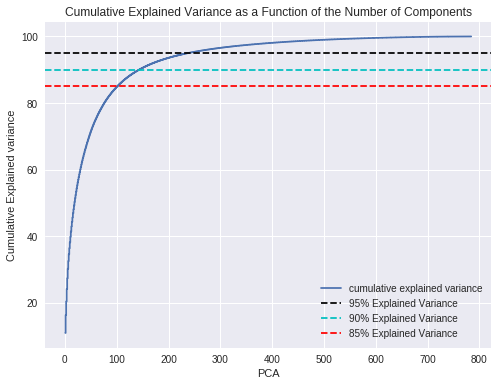

In [0]:
# 結果を描画します
plt.figure(figsize=(8, 6))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('PCA')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

---
Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [0]:
# np.argmax を用いて累積寄与分散の次元数を表示します
componentsVariance = [784, 
                      np.argmax(cum_var_exp > 99) + 1, 
                      np.argmax(cum_var_exp > 95) + 1, 
                      np.argmax(cum_var_exp > 90) + 1, 
                      np.argmax(cum_var_exp >= 85) + 1]

In [0]:
componentsVariance

[784, 500, 238, 144, 102]

In [0]:
from sklearn.decomposition import PCA

# 結果の描画のための関数を定義しておきます
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

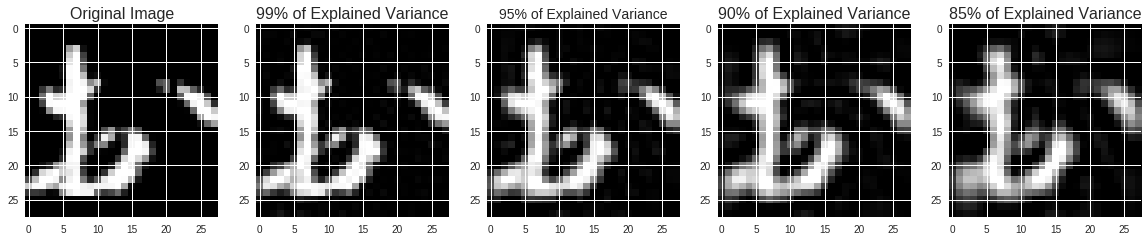

In [0]:
# 描画します
plt.figure(figsize=(20,4))

n = 12
fontsize_ = 14 
X = X_train.reshape(-1,28*28)
# Original Image
plt.subplot(1, 5, 1);
plt.imshow(X_train[n].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
#plt.xlabel('full Components', fontsize=fontsize_)
plt.title('Original Image', fontsize=fontsize_+2);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, X)[n].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
#plt.xlabel('331 Components', fontsize=fontsize_)
plt.title('99% of Explained Variance', fontsize=fontsize_+2);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, X)[n].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
#plt.xlabel('154 Components', fontsize=fontsize_)
plt.title('95% of Explained Variance', fontsize=fontsize_);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, X)[n].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
#plt.xlabel('87 Components', fontsize=fontsize_)
plt.title('90% of Explained Variance', fontsize=fontsize_+2);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, X)[n].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
#plt.xlabel('59 Components', fontsize=fontsize_)
plt.title('85% of Explained Variance', fontsize=fontsize_+2);

---

## ロジスティック回帰

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Broyden, Fletcher, Goldfarb, Shanno (BFGS) アルゴリズムを説明するのは詳細すぎるので省略します
logisticR = LogisticRegression(solver = 'lbfgs')

In [0]:
X = X_train.reshape(-1,28*28)
logisticR.fit(X, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
X_test_ = X_test.reshape(-1,28*28)
logisticR.predict(X_test_[0].reshape(1,-1)) # 予測してみましょう
# 表示される数字の意味は {0: 'お', 1: 'き', 2: 'す', 3: 'つ', 4: 'な', 5: 'は', 6: 'ま', 7: 'や', 8: 'れ', 9: 'を'}
print(y_test[0])

2


In [0]:
num = 30 # 30 データだけ予測してみます。訓練データを使います

print(logisticR.predict(X[0:num]))
print(y_train[:num])
print(((logisticR.predict(X[0:num]) == y_train[0:num]) * 1).sum() * 1. / num)

[8 8 0 1 4 2 4 3 8 1 5 1 0 5 7 6 1 7 9 8 7 3 7 5 6 6 8 7 6 0]
[8 7 0 1 4 2 4 8 1 1 5 1 0 5 7 6 1 7 9 5 7 3 7 5 6 6 2 7 6 0]
0.8333333333333334


In [0]:
num = 30 #  今度はテストデータで予測します
X_test_ = X_test.reshape(-1,28*28)
print(logisticR.predict(X_test_[0:num]))
print(y_test[:num])
print(((logisticR.predict(X_test_[0:num]) == y_test[0:num]) * 1).sum() * 1. / num)

[5 9 3 8 3 3 8 3 2 6 6 3 3 3 8 5 4 8 6 3 6 0 7 5 7 0 8 2 4 4]
[2 9 3 8 3 3 8 3 2 5 6 3 3 3 1 5 4 8 6 3 7 5 7 5 7 0 3 5 4 4]
0.7666666666666667


In [0]:
logisticR.score(X_test_, y_test) # 全体では精度はどのくらいでしょうか

0.6754

----
<https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb>